
<img src="./logo_UTN.svg" align="right" width="150" /> 
 Teoría de Circuitos II

# Trabajo semanal 5
#### Israel Pavelek



1) Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte = 300 Hz) y un cero de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:


<img src="./enunciado.png" align="center" width="400" /> 

1. Determine la expresión de H(s) del filtro pasa-altos normalizado                    
1. Realizar el diagrama de polos y ceros de H(s)                                             
1. Sintetice el circuito del filtro pedido. Se utilizará para la estructura de segundo orden el siguiente circuito:

<img src="./enunciado2.png" align="center" width="400" /> 


El filtro pasabajo prototipo propuesto tiene un cero en 3 y 3 polos, para cumplir las pendientes de modulo deseadas, a fin de que la frecuencia de corte sea en $\omega=1$ el denominador debe ser de Butterworth:

$$T(s)=\frac{1}{9}\frac{s^2+9}{(s^2+s+1) \cdot (s+1)}$$

La constante se encontró a fin que la transferencia fuera unitara para $\omega=0$





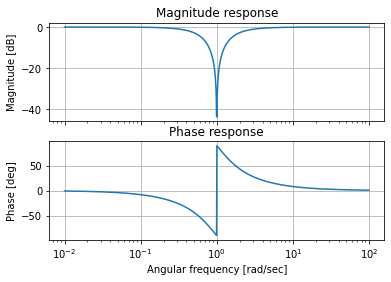

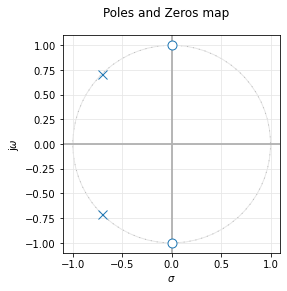

In [86]:
import scipy.signal as sig
import matplotlib as mpl
from splane import *

num=[1,0,1]
den=[1,1.41,1] 
all_sys=(sig.TransferFunction(num,den))
filter_names=("Filtro")

fig_id, axes_hdl = bodePlot(all_sys, 1, ())
analog_fig_id, analog_axes_hdl = pzmap(all_sys, filter_names, 3, ())

Para pasar al prototipo pasa alto normalizado reemplazamos s por 1/s


$$T(s)=\frac{1}{9}\frac{\frac{1}{s^2}+9}{(\frac{1}{s^2}+\frac{1}{s}+1) \cdot (\frac{1}{s}+1)}$$

simplificando queda:

$$T(s)=\frac{s(s^2+\frac{1}{9})}{(s^2+s+1)(s+1)}$$




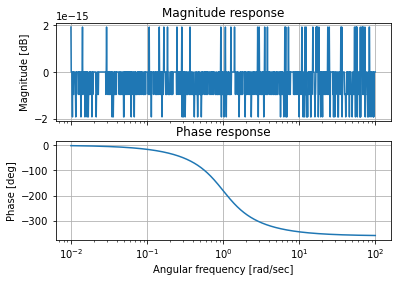

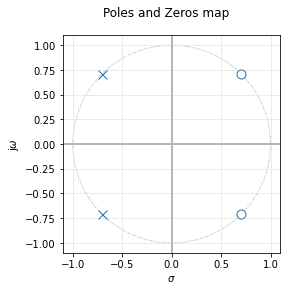

In [92]:
num=[1,-1.41,1]
den=[1,1.41,1] 
all_sys=(sig.TransferFunction(num,den))
filter_names=("Filtro")

fig_id, axes_hdl = bodePlot(all_sys, 1, ())
analog_fig_id, analog_axes_hdl = pzmap(all_sys, filter_names, 3, ())

Vamos a redibujar el circuito para ver más claramente que tenemos:
    
<img src="./eq1.png" align="center" width="400" /> 

Veamos una implementación y su transferencia para comparar:

<img src="./bicuad.png" align="center" width="400" /> 

Por considerar opamp ideales:

$V_4=V_5=V_6$

Ahora 

Miramos los nodos

En $V_6$:

$(Gc+G(1-c)+SC)V_6=V_1Gc+V_2SC$

$(G+SC)V_6=V_1Gc+V_2SC$

En $V_4$:

$2GV_4=V_2G+V_3G$

En $V_5$:

$(\frac{Gb}{Q}+\frac{G(1-b)}{Q}+(1-a)SC+aSC+G)V_5=V_3G+V_1(\frac{Gb}{Q}+aSC)$

$(\frac{G}{Q}+SC+G)V_5=V_3G+V_1(\frac{Gb}{Q}+aSC)$

Si $\omega_0=\frac{G}{C}$ y recordando que $V_4=V_5=V_6$ llevamos la expresión de $V_5$ y $V_6$ a $V_4$ queda:

$(\omega_0+S)V_4=\omega_0V_1c+V_2S$

$2V_4=V_2+V_3$

$(\frac{\omega_0}{Q}+S+\omega_0)V_4=V_3\omega_0+V_1(\frac{\omega_0b}{Q}+aS)$

$(\omega_0+\frac{\omega}{Q}+s)(\frac{V_2S+V_1\omega_0c}{s+\omega_0}=V_1(b\frac{\omega_0}{Q}+as)+(2V_4-V_2)\omega_0$

$\frac{V_2s}{s+\omega_0}(\omega_0+\frac{\omega_0}{Q}+s)+\frac{V_1\omega_0c}{s+\omega_0}(\omega_0+\frac{\omega_0}{Q}+s)=V_1(b\frac{\omega_0}{Q}+as)+2\omega_0(\frac{V_2s+V_1\omega_0c}{\omega_0+s)}-V_2\omega_0$

$V_2[s\omega_0+\frac{\omega_0}{Q}s+s^2-2\omega_0s+\omega_0s+\omega_0^2]=V_1[(s+\omega_0)(b\frac{\omega_0}{Q}+as)+2\omega_0^2c-\frac{\omega_0^2c}{Q}-\omega_0cs]$

$\frac{V_2}{V_1}=\frac{as^2+s[b\frac{\omega_0}{Q}+a\omega_0-\omega_0c]+\omega_0^2(\frac{b}{Q}+2c-c-\frac{c}{Q}}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}$

$$\frac{V_2}{V_1}=\frac{as^2+s\frac{\omega_0}{Q}[b+Q(a-c)]+\omega_0^2(c+\frac{1}{Q}(b-c))}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}$$

Vemos que en nuestro caso

a=1
c=1
b=0

Con lo que obtenemos:

$$\frac{V_2}{V_1}=\frac{s^2+\omega_0^2(1-\frac{1}{Q})}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}$$

Vemos que utilizando esta topología, con los valores de a,b y c definidos, y la ubicación del cero, tenemos el Q fijado. En este caso nos quedaria un Q de $\frac{9}{8}=1.125$ lo que nos daria un filtro que no cumpliria con la especificación de frecuencia de corte por lo tanto, no podemos utilizar este analisis.

Desarrollando las mismas ecuaciones pero ahora dejando que G2,G3 y G1 no valgan G obtenemos: 

$$T(s)=\frac{s^2+\frac{G_2G_3}{C^2}-\frac{G_3G_1}{C^2}}{s^2+s\frac{G_1}{C}+\frac{G_2G_3}{C^2}}$$

Adoptamos que C=1

Para obtener $\omega_0=1$

$G_2=\frac{1}{G_3}$

y como $G_3G_1=\frac{8}{9}$

y $G_1=1$

$G_3=\frac{8}{9}=0,88$

$G_2=1,125$


Para la etapa faltante

Utilizamos un pasa alto de primer orden realizado con un capacitor y un resistor

$T(s)=\frac{s}{s+\frac{1}{CR}}$

Adoptamos C=1 y R=1

Simulacion de la red normalizada:

<img src="./finalnorm.png" align="center" width="400" /> 

Desnormalizamos todo para R=10K y frecuencia 300Hz


<img src="./final.png" align="center" width="400" /> 
